In [5]:
!pip install --upgrade numba cloudpickle
!pip install umap-learn

In [6]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import numpy as np

In [8]:
src_df = pd.read_csv('/content/drive/MyDrive/CancerCell/24 April/NewDataSet_Ravaee_Feb2024/Dataset1 Scripts/features_JM28_3Lines_DNA_H2AX_ki67_20240401.csv')
print(src_df.columns[11:])
org_columns = list(src_df.columns[11:])

Index(['Intensity_MinIntensityEdge_H2AX', 'Intensity_IntegratedIntensity_DNA',
       'Intensity_StdIntensity_Ki67', 'AreaShape_Area',
       'Intensity_MinIntensity_Ki67', 'Intensity_IntegratedIntensity_H2AX',
       'Intensity_MinIntensityEdge_DNA', 'Intensity_StdIntensityEdge_DNA',
       'Intensity_MaxIntensity_H2AX', 'AreaShape_Solidity',
       'Intensity_StdIntensityEdge_Ki67', 'Intensity_MADIntensity_DNA',
       'AreaShape_HuMoment_2', 'Intensity_MassDisplacement_H2AX',
       'AreaShape_InertiaTensor_0_0', 'Intensity_MassDisplacement_DNA',
       'Intensity_MassDisplacement_Ki67'],
      dtype='object')


In [9]:
['FileName_colorimage'] + org_columns

['FileName_colorimage',
 'Intensity_MinIntensityEdge_H2AX',
 'Intensity_IntegratedIntensity_DNA',
 'Intensity_StdIntensity_Ki67',
 'AreaShape_Area',
 'Intensity_MinIntensity_Ki67',
 'Intensity_IntegratedIntensity_H2AX',
 'Intensity_MinIntensityEdge_DNA',
 'Intensity_StdIntensityEdge_DNA',
 'Intensity_MaxIntensity_H2AX',
 'AreaShape_Solidity',
 'Intensity_StdIntensityEdge_Ki67',
 'Intensity_MADIntensity_DNA',
 'AreaShape_HuMoment_2',
 'Intensity_MassDisplacement_H2AX',
 'AreaShape_InertiaTensor_0_0',
 'Intensity_MassDisplacement_DNA',
 'Intensity_MassDisplacement_Ki67']

In [10]:
_umap = pickle.load(open('/content/drive/MyDrive/CancerCell/24 April/NewDataSet_Ravaee_Feb2024/Dataset1 Scripts/result 5.13.24/umap.pickle', "rb"))

In [11]:
kmeans = pickle.load(open('/content/drive/MyDrive/CancerCell/24 April/NewDataSet_Ravaee_Feb2024/Dataset1 Scripts/result 5.13.24/kmeans.pickle', "rb"))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 1.4.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
def show_result(path, org_columns):
  df = pd.read_csv(path)
  df = df[['FileName_colorimage'] + org_columns]
  real_y = df.FileName_colorimage.values
  real_y = [y.split('.')[0] for y in real_y ]
  real_y = [int(y.split('_')[-1]) for y in real_y]
  real_y = np.asarray(real_y)
  data = df.iloc[:,1:].values
  data = StandardScaler().fit_transform(data)
  embeddings = _umap.transform(data)
  plt.scatter(embeddings[:,0],embeddings[:,1])
  plt.show()
  y_ = kmeans.predict(embeddings)
  comparison  = y_ == real_y
  print('TP',np.sum(comparison) , 'FN', np.sum(~comparison) ,'ACC', np.sum(comparison)/y_.shape[0])
  plt.scatter(embeddings[:,0],embeddings[:,1],c=y_)
  plt.show()
  plt.scatter(embeddings[:,0],embeddings[:,1] , c=real_y)
  plt.show()

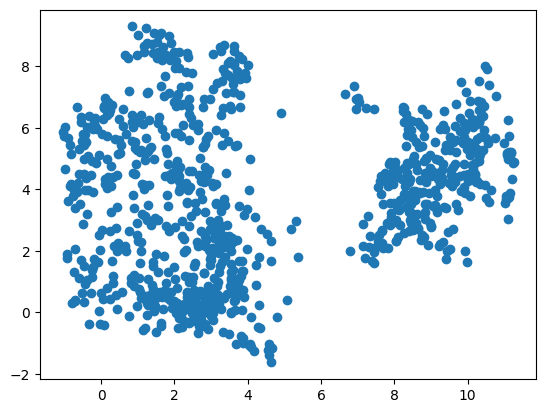

TP 579 FN 321 ACC 0.6433333333333333


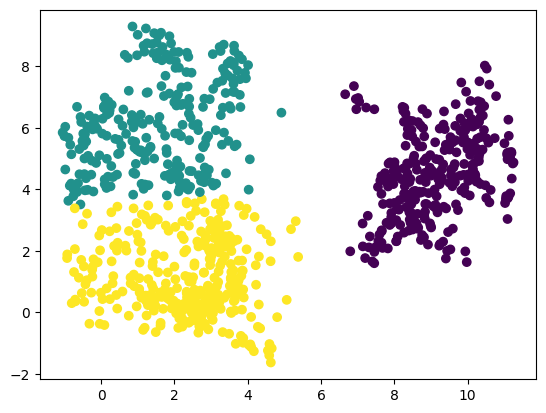

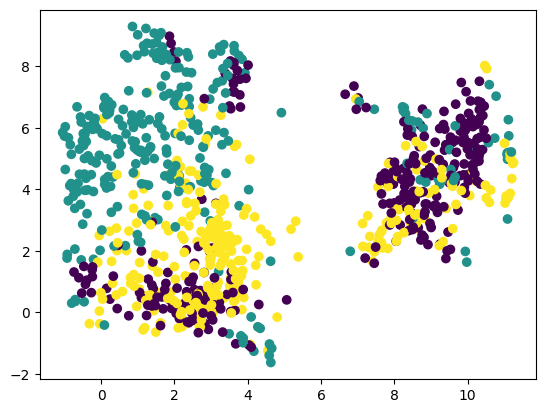

In [13]:
path = '/content/drive/MyDrive/CancerCell/24 April/NewDataSet_Ravaee_Feb2024/Dataset1 Scripts/result 5.13.24/cGAN_Sample4_900images.csv'
show_result(path, org_columns)

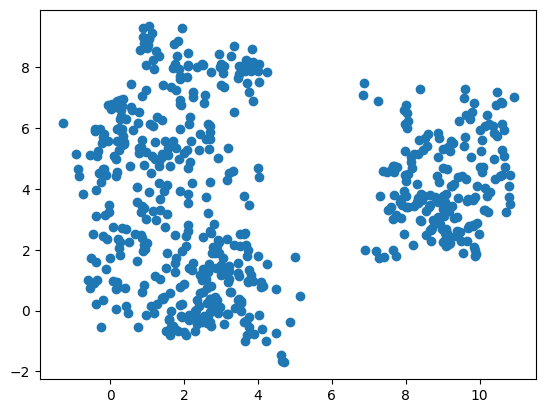

TP 389 FN 211 ACC 0.6483333333333333


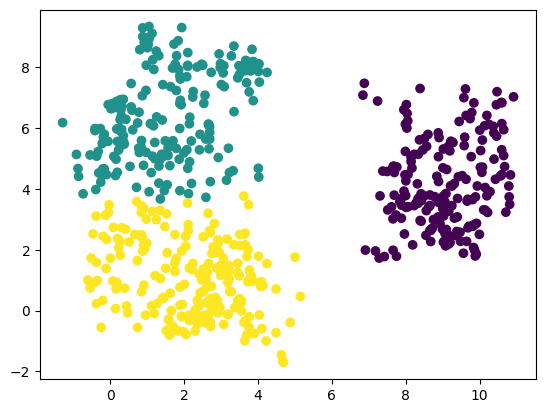

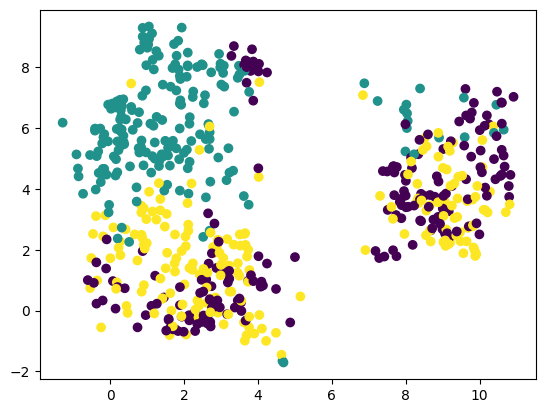

In [ ]:
path = '/content/drive/MyDrive/CancerCell/24 April/NewDataSet_Ravaee_Feb2024/Dataset1 Scripts/result 5.13.24/cGAN600images.csv'
show_result(path, org_columns)

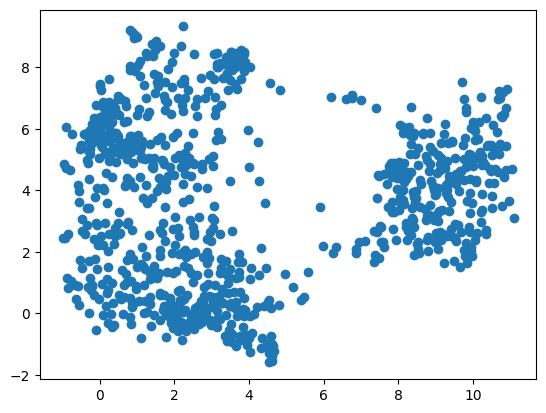

TP 591 FN 308 ACC 0.657397107897664


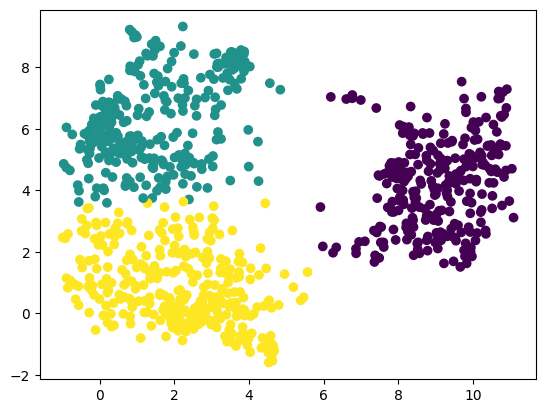

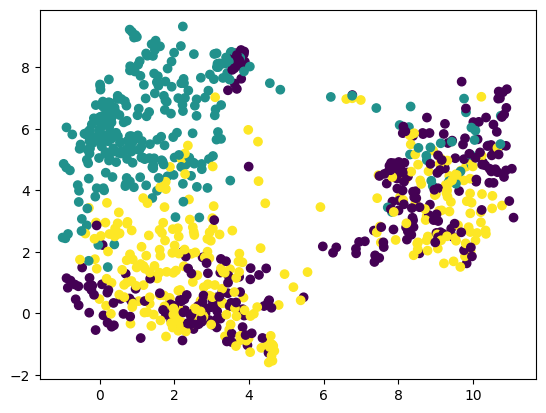

In [ ]:
path = '/content/drive/MyDrive/CancerCell/24 April/NewDataSet_Ravaee_Feb2024/Dataset1 Scripts/result 5.13.24/cGAN_Sample2_900images.csv'
show_result(path, org_columns)

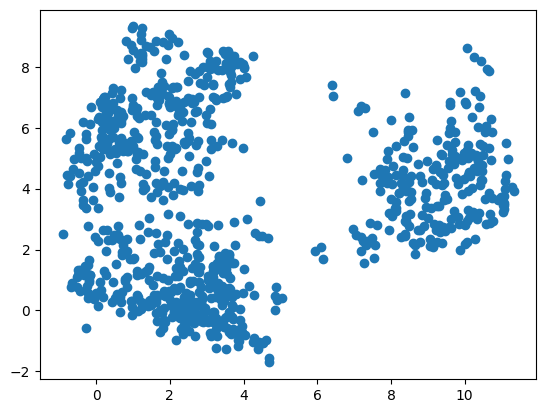

TP 605 FN 294 ACC 0.6729699666295884


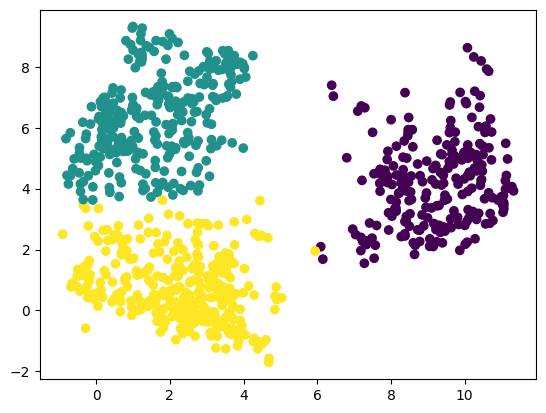

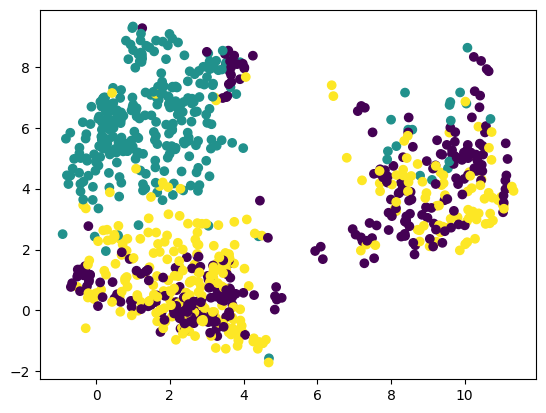

In [ ]:
path = '/content/drive/MyDrive/CancerCell/24 April/NewDataSet_Ravaee_Feb2024/Dataset1 Scripts/result 5.13.24/cGAN_Sample3_900images.csv'
show_result(path, org_columns)